<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">
<font face='Liberation serif' size=3>
    
#### **Привет, Павел!** 👋

Меня зовут Артём Пиляй. Я буду проверять твой проект «*Исследование развития игровой индустрии с 2000 по 2013 год*» 🧙.

---

В рамках корпоративной этики мы общаемся на «ты». Но если лучше на «Вы», то важно обозначить это сразу.

---

Комментарии к проекту размещены в отдельных ячейках Markdown. Для удобства они отображаются в меню **Contents** слева. 

Я использую четыре типа комментариев:

---

✅ или 👍 Главый комментарий — значит, всё сделано хорошо. А ещё здесь могут быть подсказки, как улучшить проект.

---

⚠️ Рекомендуемый к исправлению — лучше внести правки, хотя это не критично для текущего проекта. Но начиная со следующего проекта такие комментарии будут считаться критическими.

---

⛔ или️ ❌ Обязателен к исправлению — важный комментарий, который нужно доработать, чтобы проект прошёл проверку.

---

🚩 Красный флаг — проверку пришлось прервать, так как действие в ячейке выше повлияло на весь дальнейший проект.
    
<br>    

<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

Важно:
- Не перемещай и не удаляй мои комментарии. Если они будут удалены, я верну последнюю версию проекта, где они сохранились.
- Если возникнут вопросы, их можно задать в шаблоне, который я оставил ниже — он появится в меню Contents, и я точно его увижу.
	
</div>

🏁 [Перейти к итогам ревью](#results)

<a id="start"></a>

# Проект спринта №7 Python. Предобработка данных

- Автор: Дерновой П.В.
- Дата: 19.04.2025

### Цели и задачи проекта 
Для привлечения новой аудитории игры «Секреты Темнолесья» и написания сатьи `"О развитии индустрии игр в начале XXI века"` проводиться анализ игровой индустрии с 2000 по 2013 год.

В проекте производитьс анализ игровых платформ на предмет:
- продажи игр
- оценки пользователей игр
- экспретные оценки игр

### Описание данных

Данные `/datasets/df_games.csv` содержат информацию о продажах игр разных жанров и платформ, а также пользовательские и экспертные оценки игр:
- `Name` — название игры.
- `Platform` — название платформы.
- `Year of Release` — год выпуска игры.
- `Genre` — жанр игры.
- `NA sales` — продажи в Северной Америке (в миллионах проданных копий).
- `EU sales` — продажи в Европе (в миллионах проданных копий).
- `JP sales` — продажи в Японии (в миллионах проданных копий).
- `Other sales` — продажи в других странах (в миллионах проданных копий).
- `Critic Score` — оценка критиков (от 0 до 100).
- `User Score` — оценка пользователей (от 0 до 10).
- `Rating` — рейтинг организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Содержимое проекта
<font color='#777778'>Ниже представлено содержание данного проекта:
1. [Загрузка и знакомство с данными;](#1)<br><br>
2. [Проверка ошибок в данных и их предобработка:](#2)<br>
  - Названия, или метки, столбцов датафрейма;<br><br>
  - Типы данных;<br><br>
  - Наличие пропусков в данных;<br><br>
  - Явные и неявные дубликаты в данных.<br><br>
3. [Фильтрация данных;](#3)<br><br>
4. [Категоризация данных;](#4)<br><br>
5. [Итоговый вывод.](#5)
</font>

<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

#### ✅ Вводная часть
    
---    
    
✅ Отлично, что есть:    

- Название проекта.    
- Понятная бизнес-задача.
- Описание данных.    
- План работы.

Это сразу делает проект более логичным и понятным для читателя. 
    
---

💬 **Здесь можно оставить комментарий**

##  Загрузка данных и знакомство с ними <a id='1'></a>

Загрузим необходимые библиотеки для анализа данных и данные из датасета `new_games.csv`.


In [1]:
# Импортируем библиотеку pandas
import pandas as pd
# Подключаем библиотеку display для отображения данных
from IPython.display import display

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    
#### ✅ Структура кода
    
---
    
✅ Правильно, что разделяешь импорт от основного кода и импортируешь все библиотеки в одной ячейке в начале проекта. Это соответствует стилю PEP 8 и делает код более структурированным и понятным.

Это помогает:
- Сразу видеть, какие библиотеки используются в проекте.
- Избежать дублирования импортов в разных частях кода.
- Облегчить отладку и переносимость проекта.
    
Подробнее о PEP 8 можно прочитать в статье [*PEP 8 - руководство по написанию кода на Python*](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html).    
    
---
    
💬 **Здесь можно оставить комментарий** 

---

In [2]:
# Выгружаем данные из датасета df_games.csv в датафрейм df_games
df_games_u = pd.read_csv('https://code.s3.yandex.net/datasets/new_games.csv')

# Создаем копию датафрейма для дальнейшей работы с ней
df_games = df_games_u.copy()

Выведем основную информацию о данных с помощью метода `info()`. Дополнительно выведем первые строки датафрейма.


In [3]:
# Выводим информацию о датафрейме
df_games.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16956 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16954 non-null  object 
 1   Platform         16956 non-null  object 
 2   Year of Release  16681 non-null  float64
 3   Genre            16954 non-null  object 
 4   NA sales         16956 non-null  float64
 5   EU sales         16956 non-null  object 
 6   JP sales         16956 non-null  object 
 7   Other sales      16956 non-null  float64
 8   Critic Score     8242 non-null   float64
 9   User Score       10152 non-null  object 
 10  Rating           10085 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.4+ MB


In [4]:
# Выводим первые пять строк датафрейма на экран
df_games.head() 

,Name,Platform,Year of Release,Genre,NA sales,EU sales,JP sales,Other sales,Critic Score,User Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Датасет `new_games.csv` содержит 11 столбцов и 16956 строк, в которых представлена информация о продажах игр разных жанров и платформ, а также пользовательские и экспертные оценки игр.

<u>Изучим типы данных и их корректность:</u><br><br>
    
- **Числовые значения с плавающей запятой (float64)**. Четыре столбца представлены типом `float64`.
    - Верно принятый тип данных:
        - `NA sales`(Продажи в Северной Америке (в миллионах проданных копий)),
        - `Other sales`(Продажи в других странах (в миллионах проданных копий)),
        - `Critic Score` (оценка критиков (от 0 до 100)).
    - `Year of Release` (год выпуска игры). Тип данных для столбца выбран не оптимально. В данном случае для хранения данных предпочтительно использовать тип `int16`.
- **Строковые данные (object)**. Семь столбцов имеют тип данных `object`
    - Верно принятый тип данных:
        - `Name` (Название игры)
        - `Platform` (Название платформы),
        - `Genre` (Жанр игры),
        - `Rating` (Рейтинг организации ESRB)
    - `EU sales`, `JP sales` (Продажи в Европе и Японии (в миллионах проданных копий)) хранят числовые дробные значения и требуют приведения к типу данных `float64`.
    
После анализа типов данных видно, что ряд столбцов требует проведения корректировки их типов данных. 

**Изучим наличие пропусков в данных:**
    
Учитывая, что датафрейм содержит 16956 строк, проанализируем содержимое его столбцов. Столбцы `Platform`,  `NA sales`, `EU sales`, `JP sales`, `Other sales`, не содержат пропусков в данных. Столбца `Name` и `Genre` содержат по 2 пропуска данных. Пропуск данных для столбца `Name` является критическим, так как не позволяет идентифицировать игры, о которых идет речь. Предлагается исключить данные строки для дальнейшего анализа. Пропуски в столбце `Genre` не являются столь критическими, так как жанр игры может быть установлен при наличии ее названия, и недастающие данные возможно добавить в датафрейм, при наличии имени игры. В столбцах `Year of Release`, `Critic Score`, `User Score`, `Rating`  пропущено большое количество значений, данный факт необходимо учитывать при дальнейшем анализе данных.

<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

#### ✅ Аналитическая часть работы
    
---
    
✅ Молодец. Качественное знакомство с данными помогает понять, какие дальнейшие шаги предпринять, а также формирует общее представление о предстоящей работе.    
    
---

💬 **Здесь можно оставить комментарий**

---

##  Проверка ошибок в данных и их предобработка <a id='2'></a>


###  Названия, или метки, столбцов датафрейма

Выведем на экран названия всех столбцов датафрейма и проверим в каком стиле они написаны.


In [5]:
# Выводим названия столбцов
print(df_games.columns) 

Index(['Name', 'Platform', 'Year of Release', 'Genre', 'NA sales', 'EU sales',
       'JP sales', 'Other sales', 'Critic Score', 'User Score', 'Rating'],
      dtype='object')


Приводим названия столбцов к стилю snakecase

In [6]:
# Приводим названия столбцов к стилю snake case
df_games.columns = df_games.columns.str.lower().str.replace(' ', '_')

# Проверяем корректность выполнения опреации
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

#### ✅ Snake case
    
---
    
✅ Все верно. Так же можно использовать метод `rename`.
    
---

💬 **Здесь можно оставить комментарий**

### Типы данных

- На основе изложенного в Разделе 1, считаем что для следующих столбцов установлены некорректные типы данных:

> `platform`         -  object
>
> `year_of_Release`  -  float64
>
> `genre`            -  object
>
> `eu_sales`         -  object
>
> `jp_sales`         -  object
>
> `user_score`       -  object
>
> `rating`           -  object 

Приведем типы данных в этих столбцах к следующему виду:
> `platform`         -  category
> 
> `year_of_release`  -  int16
> 
> `genre`            -  category
> 
> `eu_sales`         -  float64
> 
> `jp_sales`         -  float64
> 
> `user_score`       -  float64
> 
> `rating`           -  category

В первую очередь выполним преобразование типов столбцов `platform`, `genre` и `rating` к типу `category`. Для начала убедимься, что данные в этих столюцах принимают ограниченные диапазоны значений:

In [7]:
#выводим строки датафрейма df_games, содержащие пропуски в поле genre
df_games[df_games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
661,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN
14439,NaN,GEN,1993.0,NaN,0.00,0.0,0.03,0.00,NaN,NaN,NaN


Как мы можем заметить, данные две строки, кроме пропусков в поле `genre`, содержат также пропуски в полях `name`, `critic_score` и `user_score rating`. Отсутствие информации в поле `name` делает восстановление пропущенных данных в этих строках - невозможным. При решении данной задачи, данные строки предлагается удалить.

<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

#### ✅ Аналитическая часть работы
    
---
    
✅ Отлично, что подробно описываешь ход решения.
    
---

💬 **Здесь можно оставить комментарий**

In [8]:
# Отбираем в датафрейм df_games строки без пропусков в столбце genre из исходного 
    # датафрейма df_games
df_games = df_games[~df_games['genre'].isna()]

Избавляемся от  неявных дубликатов в столбце `genre`:

- проверяем уникальные значения в столбце `genre`

In [9]:
df_games['genre'].sort_values(ascending=False).unique()

array(['Strategy', 'Sports', 'Simulation', 'Shooter', 'STRATEGY',
       'SPORTS', 'SIMULATION', 'SHOOTER', 'Role-Playing', 'Racing',
       'ROLE-PLAYING', 'RACING', 'Puzzle', 'Platform', 'PUZZLE',
       'PLATFORM', 'Misc', 'MISC', 'Fighting', 'FIGHTING', 'Adventure',
       'Action', 'ADVENTURE', 'ACTION'], dtype=object)

In [10]:
# Приводим все значения в столбце genre к нижнему регистру
df_games['genre']=df_games['genre'].str.lower()

<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

#### ✅ Нормализация данных
    
---
    
✅ Молодец, что проводишь нормализацию. Если столлбцов несколько, то можно использовать [лямбда-функцию](https://habr.com/ru/companies/piter/articles/674234/):
    
```py
df[['name', 'address']] = df[['name', 'address']].apply(lambda x: x.str.lower())
```
    
---

💬 **Здесь можно оставить комментарий**    

Повторно проверим уникальные значения, содержащиеся в столбце `genre`:

In [11]:
df_games['genre'].sort_values(ascending=False).unique()

array(['strategy', 'sports', 'simulation', 'shooter', 'role-playing',
       'racing', 'puzzle', 'platform', 'misc', 'fighting', 'adventure',
       'action'], dtype=object)

Теперь дубликатов нет


- Проверяем уникальные значения в столбце `rating':

In [12]:
df_games['rating'].sort_values(ascending=False).unique()

array(['T', 'RP', 'M', 'K-A', 'EC', 'E10+', 'E', 'AO', nan], dtype=object)

В столбце `rating` присутствуют пропуски значений. Обработаем их. Для всех пропусков установим значение - `нет рейтинга`.

<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

#### ✅ Аналитический подход.
    
---
    
✅ Молодец, что смотришь на контекст данных при работе с ними.
        
    
</div>

In [13]:
# Производим замену пропуско
df_games['rating'] = df_games['rating'].fillna('нет рейтинга')
# Выводим для проверки значения столбца rating
df_games['rating'].sort_values(ascending=False).unique()

array(['нет рейтинга', 'T', 'RP', 'M', 'K-A', 'EC', 'E10+', 'E', 'AO'],
      dtype=object)

Выполним изменение типа данных для столбцов `platform`, `genre`, `rating`

In [14]:
#Выводим информация о датафрейме df_games до изменения типов данных
print(df_games.info())
#Изменяем типы данных для столбцов platform, genre, rating с object на category
df_games['platform'] = df_games['platform'].astype('category')
df_games['genre'] = df_games['genre'].astype('category')
df_games['rating'] = df_games['rating'].astype('category')
#Выводим информация о датафрейме df_games после изменения типов данных, проверяем свои действия
print(df_games.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16954 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16954 non-null  object 
 1   platform         16954 non-null  object 
 2   year_of_release  16679 non-null  float64
 3   genre            16954 non-null  object 
 4   na_sales         16954 non-null  float64
 5   eu_sales         16954 non-null  object 
 6   jp_sales         16954 non-null  object 
 7   other_sales      16954 non-null  float64
 8   critic_score     8242 non-null   float64
 9   user_score       10152 non-null  object 
 10  rating           16954 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 16954 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16954 non-null  objec

<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

#### ✅ Преобразование типов данных
    
---
    
✅ Еще можно использовать `to_numeric`.
    
---

💬 **Здесь можно оставить комментарий**

Тип данных для столбцов `platform`, `genre`, `rating` был изменен с `object` на `category`.


Далее изменим тип данных для столбца `year_of_release` с `float64` на `int16`.

In [15]:
#Заменяем пропуски в данном столбце на маркер -1
df_games['year_of_release'] = df_games['year_of_release'].fillna(-1)
#Изменяем тип данных для столбца year_of_releas с float64 на int16
df_games['year_of_release'] = df_games['year_of_release'].astype('int16')
#Выводим информация о датафрейме df_games после изменения типов данных, проверяем свои действия
print(df_games.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16954 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16954 non-null  object  
 1   platform         16954 non-null  category
 2   year_of_release  16954 non-null  int16   
 3   genre            16954 non-null  category
 4   na_sales         16954 non-null  float64 
 5   eu_sales         16954 non-null  object  
 6   jp_sales         16954 non-null  object  
 7   other_sales      16954 non-null  float64 
 8   critic_score     8242 non-null   float64 
 9   user_score       10152 non-null  object  
 10  rating           16954 non-null  category
dtypes: category(3), float64(3), int16(1), object(4)
memory usage: 1.1+ MB
None


<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

#### ✅  Использование заглушки

Верно, заглушку лучше делать аномальной. Это упрощает понимание её сути и значительно снижает вероятность забыть про неё, а значит экономит время.
        
✅   Но важно удалять её при анализе статистических метрик, так как они могут сместить результат и исказить результаты исследования.
        
---

💬 **Здесь можно оставить комментарий**        

Тип данных для столбца `year_of_release` был изменен с `float64 ` на `int16`.


Далее изменим тип данных для столбцов `eu_sales`, `jp_sales`, `user_score`  с `object ` на `float64`.

In [16]:
#Заменяем текстовые значения на маркер -1. 
df_games['eu_sales']=df_games['eu_sales'].astype(str).str.replace('unknown','-1')
df_games['jp_sales']=df_games['jp_sales'].astype(str).str.replace('unknown','-1')
df_games['user_score']=df_games['user_score'].astype(str).str.replace('tbd','-1')
#Изменяем типы данных с object на float64.
df_games['eu_sales'] = df_games['eu_sales'].astype('float64')
df_games['jp_sales'] = df_games['jp_sales'].astype('float64')
df_games['user_score'] = df_games['user_score'].astype('float64')

# Преобразовываем типы данных с понижением разрядности
for column in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']:
    df_games[column] = pd.to_numeric(df_games[column], downcast='float')

#Выводим информация о датафрейме df_games после изменения типов данных, проверяем свои действия
print(df_games.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16954 entries, 0 to 16955
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16954 non-null  object  
 1   platform         16954 non-null  category
 2   year_of_release  16954 non-null  int16   
 3   genre            16954 non-null  category
 4   na_sales         16954 non-null  float32 
 5   eu_sales         16954 non-null  float32 
 6   jp_sales         16954 non-null  float32 
 7   other_sales      16954 non-null  float32 
 8   critic_score     8242 non-null   float32 
 9   user_score       10152 non-null  float32 
 10  rating           16954 non-null  category
dtypes: category(3), float32(6), int16(1), object(1)
memory usage: 747.1+ KB
None


Ряд проделанных выше операций, позволили нам:
1. Уменьшить количество используемой памяти с 1.6+ MB до 1.1+ MB;
2. Убрать пропуски в столбцах `name`, `genre`, `rating`.
3. Убрать пропуски в столбце `year_of_release`.
4. Изменить тип данных на необходимый

<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

#### ✅ Аналитическая часть работы
    
---
    
✅ Молодец.
    
---

💬 **Здесь можно оставить комментарий**

### Наличие пропусков в данных

Посчитаем количество пропусков в каждом столбце в абсолютных и относительных значениях:
- в абсолютных значениях:

In [17]:
# Выводим количество пропущенных строк в датафрейме
df_games.isna().sum().sort_values(ascending=False)

critic_score       8712
user_score         6802
name                  0
year_of_release       0
platform              0
genre                 0
na_sales              0
jp_sales              0
eu_sales              0
other_sales           0
rating                0
dtype: int64

<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

#### ✅ Сортировка
    
---
    
⚠️ Лучше отсортировать значения - это упрощает восприятие этих данных и ускоряет знакомство с ними.
    
Я в целом за сортироку, где это уместно (например в графиках со временем - нет). Так мы видим то, что нас интересует первым. И уменьшаем шансы ошибиться, когда значения близки друг к другу.

Такие мелочи экономят время и нервы.
    
Этот комментарий относится ко всему проекту.   
    
---

💬 **Отсортировал**   
    
---
    
    
️✅ Лови как это можно сделать еще:
    

```py    
(pd.DataFrame({'Кол-во пропусков': df.isnull().sum(), 'Доля пропусков': df.isnull().mean()*100})
           .sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))
```    
        

- в относительных значениях

In [18]:
# Подсчитываем процент строк с пропусками
round(df_games.isna().sum() / len(df_games) * 100 , 2)

name                0.00
platform            0.00
year_of_release     0.00
genre               0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.39
user_score         40.12
rating              0.00
dtype: float64

<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

#### ✅ Работа с процентами
    
---
    
✅ Молодец, что смотришь проценты, так удобнее оценить масштаб проблемы.
    
---

💬 **Здесь можно оставить комментарий**

**Изучим данные с пропущенными значениями:**
    
`Столбец name`
В данном стобце присутствуют две строки с пропусками данных. Так как значение, присутствующее в данном поле является ключевым для определения видеоигры - возможность восстановить данные, находящиеся в данных пропусках - отсутствует. Данные пропуски составляют порядка 0,01% от общего набора данных. Для борьбы с данными пропусками предлагается выполнить удаление строк, в которых были пропущены данные значения. Потеря данных строк не должна оказать весомого влияния на общий результат анализа данных. Обработка данных пропусков произведена в разделе 2.2 - строка `df_games = df_games[~df_games['genre'].isna()]` (так как пропуски одновременно содержались в стобцах `name` и  `genre`).
    
`Столбец platform`
В данном стобце отсутствуют строки с пропусками данных. Работа над устранением пропусков данных не производилась.
    
`Столбец year_of_releas`
В данном столбце присутствуют строки с пропусками данных. Общее число строк с пропусками данных составляет порядка 1.6% от общего числа строк. В качестве алгоритма борьбы с данными пропусками выбрана замена пропусков на значения индикаторы. В качестве индикатора отсутствия данных выбрано значение -1. Обработка пропусков произведена в разделе 2.2 `df_games['year_of_release'] = df_games['year_of_release'].fillna(-1)`.
    
`Столбец genre`
В данном стобце присутствуют две строки с пропусками данных. Дополнительно в данных строках отсутствуют данные и в столбце `name`. Так как значение, присутствующее в поле `name` является ключевым для определения видеоигры - возможность восстановить данные, находящиеся в данных пропусках - отсутствует. Данные пропуски составляют порядка 0,01% от общего набора данных. Для борьбы с данными пропусками предлагается выполнить удаление строк, в которых были пропущены данные значения. Потеря данных строк не должна оказать весомого влияния на общий результат анализа данных. Обработка данных пропусков произведена в разделе 2.2 - строка `df_games = df_games[~df_games['genre'].isna()]`.
    
`Столбец na_sales`
В данном стобце отсутствуют строки с пропусками данных. Работа над устранением пропусков данных не производилась.
    
`Столбец eu_sales` 
Первоночальная обработка данных данного столбца при помощи выражения `eu_sales_nan=df_games[df_games['eu_sales'].isna()].shape[0]` показала, что в данном столбце нет пропусков. Данная информация является не совмем корректной, так как явных пропусков в данном столбце не было, но зато были ячейки содержащие значение - unknown, которые при первичной обработке, были заменены нами на значение -1. Посчитаем общее количество таких пропусков значений:   
    

<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

#### ✅ Аналитическая часть работы
    
---
    
✅ Отличный  вывод.
    
---

💬 **Здесь можно оставить комментарий**

Для обработки пропусков данных значений предлагается выполнить их замену на среднее значение в зависимости от названия платформы и года выхода игры:

In [19]:
#Проводим заполнение пропусков средними значениями в зависимости от платформы и года выхода   
    # игры при помощи метода apply и пользовательской функции mean_platform_year
def mean_platform_year(row):
    if row['eu_sales']==-1:
        group = df_games[(df_games['platform'] == row['platform']) & 
                   (df_games['year_of_release'] == row['year_of_release'])]
        return group['eu_sales'].mean()
    else:
        return row['eu_sales']
df_games['eu_sales'] = df_games.apply(mean_platform_year, axis=1)

<div style="background-color: white; border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">
    
#### ✅ Соблюдение PEP 8

---

⚠️ Лучше во всем проекте перенести длинные комментарии на новую строку, чтобы они не превышали 79 символов. Я не считаю символы, главное, чтобы текст не выходил за пределы ячейки (это зависит от разрешения экрана). Код можно не переносить, но лучше учитывать эту рекомендацию при написании будущих проектов.

Соблюдение международных стандартов PEP 8 важно для улучшения читаемости как кода, так и комментариев. Когда строки слишком длинные, это затрудняет восприятие и требует прокрутки, а это тратит время. Хорошо читаемый код и комментарии улучшат совместную работу с другими разработчиками.

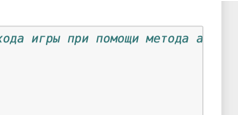
    
Подробнее о PEP 8 можно прочитать в статье [*PEP 8 - руководство по написанию кода на Python*](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html).    
    
---
    
💬 Поправил во всем проекте

---
    
✅ За это отдельно спасибо!

Для обработки пропусков данных значений предлагается выполнить их замену на среднее значение в зависимости от названия платформы и года выхода игры:

In [20]:
#Проводим заполнение пропусков средними значениями в зависимости от платформы и года выхода  
    # игры при помощи метода apply и пользовательской функции mean_platform_year_2
def mean_platform_year_2(row):
    if row['jp_sales']==-1:
        group = df_games[(df_games['platform'] == row['platform']) & 
                   (df_games['year_of_release'] == row['year_of_release'])]
        return group['jp_sales'].mean()
    else:
        return row['jp_sales']
df_games['jp_sales'] = df_games.apply(mean_platform_year_2, axis=1)

<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

#### ✅ Обработка пропущенных значений
    
---
    
✅ В этом проекте верно. 
    
Но подсвечу на будущее:

🔹 Твои лучшие помощники в работе с пропусками — логика, здравый смысл и понимание данных.

Перед тем как заполнять пропуски, ответь на вопросы:

✔ Если столбец не критичен для анализа, можно оставить его как есть.

✔ Если он важен, подумай, как заполнение повлияет на результат. Замена ради замены не имеет смысла. 

✔ Можно ли заполнить пропуски с высокой точностью? Представь, что от этого зависит твоя годовая премия. 😏

Если точное заполнение невозможно:

👉 Пропуски не мешают — оставь их.

👉 Пропуски мешают — используй заглушку (например, -1 или 0, если такие значения не встречаются в данных).

🚨 Важно: при анализе такие значения нужно обрабатывать отдельно (удалять или учитывать как пропуски).

Практикуйся. Чем больше ты работаешь с реальными данными, тем проще становится понимать, как обрабатывать пропуски.

Если бы это был реальный проект, уточнить у заказчика, как он хочет работать с пропусками, — отличное решение. Это нормальная практика в аналитике и работе с данными.
    
---

💬 **Учту в дальнейшем**    
    
---
    
✅ Хорошо.

<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

#### ✅ Обработка пропущенных значений
    
---
    
⛔️ Так заполнять `critic_score` и `user_score` нельзя, поскольку мнения критиков и пользователей не всегда коррелируют. А с учётом того, что доля пропусков составляет 40% и 51% соответственно, восстановление значений может сильно исказить данные.
    
---

💬 **Убрал полностью блок который заполняет пропуски в столбцах `critic_score` и `user_score`**    
    
---
    
✅ Отлично.    

Столбец `rating` Данный столбец содержит большое число пропусков данных. На данном этапе оставляем пропущенные значения без принятия корректирующих действий, но учитываем их наличии в будуюем при решении задачи.
</font>

Перепроверим количество информацию по пропускам данных после их заполнения.

In [21]:
# Выводим количество пропущенных строк в датафрейме
df_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8712
user_score         6802
rating                0
dtype: int64

In [22]:
# Подсчитываем процент строк с пропусками
round(df_games.isna().sum() / len(df_games) * 100 , 2)

name                0.00
platform            0.00
year_of_release     0.00
genre               0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.39
user_score         40.12
rating              0.00
dtype: float64

Пропущенные данные остались в столбцах: 
>`critic_score`- 8712 (51.39%)
> 
> `user_score` - 6802 (40.12%)

По остальным столбцам все пропуски заполнены

###  Явные и неявные дубликаты в данных

Изучим уникальные значения в категориальных данных, связанных с названиями жанра игры, платформы, рейтинга и года выпуска. Проверим, встречаются ли среди данных неявные дубликаты, связанные с опечатками или разным способом написания. При необходимости проведем нормализацию данных.

- В столбце `genre` в данных имеется неявное дублирование. На это указывают следующие значения полученного списка: Sports - SPORTS, Platform - PLATFORM, Racing - RACING, Role-Playing - ROLE-PLAYING и др. Обработка данных значений была произведена в разеле 2.2 путем выполнения кода `df_games['genre']=df_games['genre'].str.lower()`.

- В столбце  `platform` в данных отсутствует неявное дублирование. Анализ данного столбца произведен в разделе 2.2.</font>

- В столбце  `rating ` в данных отсутствует неявное дублирование. Анализ данного столбца произведен в разделе 2.2.

<font color='#777778'>Произведем анализ столбца `year_of_release` на предмет наличия неявных дубликатов. Получим все уникальные значения из данного столбца:</font>

In [23]:
# Получим уникальные значения по столбцу 'year_of_release'
df_games['year_of_release'].sort_values(ascending=False).unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984,
       1983, 1982, 1981, 1980,   -1], dtype=int16)

На основе данного результата, можно сделать вывод, что в столбце `year_of_release` отсутствуют неявные дубликаты.

После того как данные были нормализованы и были устранены неявные дубликаты, проверим наличие явных дубликатов в данных.

In [28]:
#Найдем общее количество строк дубликатов в датафрейме df_games
duplicate_game_count=df_games.duplicated().sum()
print(f'Общее число строк дубликатов - {duplicate_game_count}')
df = df_games[df_games.duplicated()].sort_values(by='name')
display(df)

Общее число строк дубликатов - 241


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15192,Beyblade Burst,3DS,2016,role-playing,0.00,0.00,0.03,0.00,NaN,NaN,нет рейтинга
15302,11eyes: CrossOver,X360,2009,adventure,0.00,0.00,0.02,0.00,NaN,NaN,нет рейтинга
4861,18 Wheeler: American Pro Trucker,PS2,2001,racing,0.20,0.15,0.00,0.05,61.0,5.7,E
13099,4 Elements,PC,2009,puzzle,0.00,0.04,0.00,0.01,NaN,7.4,E
5236,"999: Nine Hours, Nine Persons, Nine Doors",DS,2009,adventure,0.31,0.00,0.03,0.02,NaN,NaN,нет рейтинга
...,...,...,...,...,...,...,...,...,...,...,...
16104,Yoake Yori Ruriiro na Portable,PSP,2010,adventure,0.00,0.00,0.02,0.00,NaN,NaN,нет рейтинга
10662,Yu-Gi-Oh! 5D's Wheelie Breakers,Wii,2009,racing,0.09,0.01,0.00,0.01,NaN,NaN,нет рейтинга
2909,Yu-Gi-Oh! The Falsebound Kingdom,GC,2002,strategy,0.49,0.13,0.07,0.02,NaN,NaN,нет рейтинга
6696,Zoo Resort 3D,3DS,2011,simulation,0.11,0.09,0.03,0.02,NaN,-1.0,E


In [25]:
#Проведем удаление дубликатов по всем столбцам из датафрейма df_games
df_games.drop_duplicates(inplace=True) 

<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

#### ✅ Работа с дубликатами
    
---
    
✅ Согласен, эти дубликаты смело можно удалить.
    
---

💬 **Здесь можно оставить комментарий**    

В ходе проведения работ по выявлению дубликатов была обнаружены как явные, так и не явные дубликаты. Всего было обнаружено 241 строка, которая дублируется с другими строками по своим значениям во всех столбцах. Данные строки буди удалены. Дополнительно было обнаружено наличие неявных дубликатов в столбце `genre`. Неявные дубликаты в данном столбце были устранены путем нормализаци данных и приведения написания значений к единому регистру.

При обработке датафрейма из него был удален ряд строк, статистика по удаленным строкам приведена ниже:

In [26]:
print(f'Количество строк в исходном датасете - {df_games_u.shape[0]}')
print(f'Количество строк удаленных из датасета - {df_games.shape[0]}')
print(f'Отношение количества строк удаленных из датасета к числу строк в исходном датасете - {round(1-df_games.shape[0]/df_games_u.shape[0], 2)}')

Количество строк в исходном датасете - 16956
Количество строк удаленных из датасета - 16713
Отношение количества строк удаленных из датасета к числу строк в исходном датасете - 0.01


В разделе 2 была произведена обработка датасета `df_games`. 

1. Типы данных в  столбцах были приведены к следующему виду:

> `platform`         -  category
> 
> `year_of_release`  -  int16
> 
> `genre`            -  category
> 
> `eu_sales`         -  float64
> 
> `jp_sales`         -  float64
> 
> `user_score`       -  float64
> 
> `rating`           -  category

2. Было установлено, что в ряде столбцов имеются пропуски данных. Максимальное количество пропусков данных зафиксировано в столбцах `critic_score`, `user_score` и `rating`. Проведена работа по частичному устранению пропусков в датасете.
3. Дополнительно в датасете были обнаружены как явные так и не явные дубликаты.
4. Проведена работа по нормализации данных и устранению неявных дубликатов, строки с явными дубликатами были удалены.  

## Фильтрация данных <a id='3'></a>

Отбираем данные для изучения истории продаж игр в начале XXI века, в период с 2000 по 2013 год включительно. Сохраняем новый срез данных в отдельном датафрейме -`df_new`.

In [27]:
#Произведем отбор строк, в которых значения столбца year_of_release назодятся в диапазоне 
    # от 2000 до 2013
df_new = df_games.copy()
df_new = df_new[(df_games['year_of_release'] >=2000)&(df_games['year_of_release'] <=2013)]
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12781 entries, 0 to 16954
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             12781 non-null  object  
 1   platform         12781 non-null  category
 2   year_of_release  12781 non-null  int16   
 3   genre            12781 non-null  category
 4   na_sales         12781 non-null  float32 
 5   eu_sales         12781 non-null  float64 
 6   jp_sales         12781 non-null  float64 
 7   other_sales      12781 non-null  float32 
 8   critic_score     7169 non-null   float32 
 9   user_score       8757 non-null   float32 
 10  rating           12781 non-null  category
dtypes: category(3), float32(4), float64(2), int16(1), object(1)
memory usage: 663.6+ KB
None


<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

#### ✅ Копирование датафрейма
    
---
    
⚠️ Копию датафрейма лучше сделать так, чтобы не изменить первоначальный датафрейм. Для этого в конце пишем `.copy()`:

```py
новый_датафрейм = исходный_датафрейм.copy()
```

Метод `.copy()` в `pandas` создаёт полную копию датафрейма или его части. Без `.copy()`, строка создаст “представление”, а не отдельный объект. Это означает, что изменения в **новом** датафрейме могут непредсказуемо повлиять на **исходный** датафрейм, так как **новый** датафрейм будет ссылаться на ту же область памяти.

Использование `.copy()` гарантирует, что **новый** датафрейм станет независимой копией и любые изменения в нём не затронут **исходный** датафрейм. Это особенно важно, если ты планируешь модифицировать **новый** датафрейм (например, менять значения, удалять строки и т. д.).
    
---

💬 **Исправил. Теперь стало понятно почему возникала эта ошибка**
    
---
    
✅ Хорошо.    

## Категоризация данных <a id='4'></a>
    
Разделим все игры по оценкам пользователей и выделим следующие категории:
- высокая оценка (от 8 до 10 включительно)
- средняя оценка (от 3 до 8, не включая правую границу интервала)
- низкая оценка (от 0 до 3, не включая правую границу интервала).

In [28]:
# Разбиваем на категории с помощью pd.cut на основе данных в столбце user_score
df_new['user_score_group'] = pd.cut(df_new['user_score'], bins=[0, 3, 8, 10], labels=["Низкая оценка", "Средняя оценка", "Высокая оценка"],right=False)

# Выводим результат для проверки, первые пять строк датафрейма 
display(df_new.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_group
0,Wii Sports,Wii,2006,sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,Высокая оценка
2,Mario Kart Wii,Wii,2008,racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,Высокая оценка
3,Wii Sports Resort,Wii,2009,sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,Высокая оценка
6,New Super Mario Bros.,DS,2006,platform,11.280000,9.140000,6.50,2.88,89.0,8.5,E,Высокая оценка
7,Wii Play,Wii,2006,misc,13.960000,9.180000,2.93,2.84,58.0,6.6,E,Средняя оценка


<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

#### ✅ Копирование датафрейма

---

✅  Предупреждение возникает из-за отсутствия `copy` выше.

---

💬 **Здесь можно оставить комментарий**

Разделим все игры по оценкам критиков и выделим такие категории:
- высокая оценка (от 80 до 100 включительно)
- средняя оценка (от 30 до 80, не включая правую границу интервала)
- низкая оценка (от 0 до 30, не включая правую границу интервала).

In [29]:
# Разбиваем на категории с помощью pd.cut на основе данных в столбце critic_score
df_new['critic_score_group'] = pd.cut(df_new['critic_score'], bins=[0, 30, 80, 100], labels=["Низкая оценка", "Средняя оценка", "Высокая оценка"],right=False)

# Выводим результат для проверки, первые пять строк датафрейма 
display(df_new.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_group,critic_score_group
0,Wii Sports,Wii,2006,sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,Высокая оценка,Средняя оценка
2,Mario Kart Wii,Wii,2008,racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,Высокая оценка,Высокая оценка
3,Wii Sports Resort,Wii,2009,sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,Высокая оценка,Высокая оценка
6,New Super Mario Bros.,DS,2006,platform,11.280000,9.140000,6.50,2.88,89.0,8.5,E,Высокая оценка,Высокая оценка
7,Wii Play,Wii,2006,misc,13.960000,9.180000,2.93,2.84,58.0,6.6,E,Средняя оценка,Средняя оценка


Cгруппируем данные по выделенным категориям и посчитайте количество игр в каждой категории:

In [30]:
#Выведем на экран количество игр в каждой сформированной по оценкам пользователей категории
#Для этого выполним группировку по столбцу user_score_group, этим действие мы сформируем требуемые 
    # группы
#Далее по столбцу name, произведем подсчет значений, которые попадают в данные группы при помощи 
    # метода count
print(df_new.groupby('user_score_group')['name'].count())

user_score_group
Низкая оценка      116
Средняя оценка    4081
Высокая оценка    2286
Name: name, dtype: int64


In [31]:
#Выведем на экран количество игр в каждой сформированной по оценкам критиков категории
#Для этого выполним группировку по столбцу critic_score_group, этим действие мы сформируем 
    # требуемые группы
#Далее по столбцу name, произведем подсчет значений, которые попадают в данные группы при 
    # помощи метода count
print(df_new.groupby('critic_score_group')['name'].count())

critic_score_group
Низкая оценка       55
Средняя оценка    5422
Высокая оценка    1692
Name: name, dtype: int64


<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

#### ✅ Категоризация данных
    
---
    
✅ Категоризация выполнена правильно.
    
---

💬 **Здесь можно оставить комментарий**

Выделим топ-7 платформ по количеству игр, выпущенных за весь актуальный период:

In [32]:
#Поместим в переменную top7_platform количество игр для каждой платформы
#Для этого выполним группировку по столбцу platform, этим действие мы сформируем требуемые группы
#Далее по столбцу name, произведем подсчет значений, которые попадают в данные группы при помощи 
    # метода count
top7_platform=df_new.groupby('platform')['name'].count()
#Выполним преобразование индексов
top7_platform = top7_platform.reset_index(name='count')
#Выполним сортировку датафрейма по столбцу count по убыванию
top7_platform  = top7_platform.sort_values(by=['count'],ascending=False)
#Выведем на экран первые 7 строк датафрейма
print(top7_platform.head(7))

   platform  count
16      PS2   2127
4        DS   2120
26      Wii   1275
19      PSP   1180
28     X360   1121
17      PS3   1087
6       GBA    811


<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">

#### ✅ Сортировка
    
---
    
✅ Топ-7  тоже написан правильно.
    
---

💬 **Здесь можно оставить комментарий**

## Итоговый вывод <a id='5'></a>

При работе с данным датосетом были выполнены следующие операции:
1. В разделе 2.1 проведена работа над корректировкой названий столбцов датафрейма.
2. В разделе 2.2 выполнена корректировка типов данных в соответствии со значениям, содержащимися в столбцах датафрейма.
3. В разделе 2.3 выполнен поиск пропусков данных в датасете, выполнено частичное удаление или заполнение пропусков данных.
4. В разделе 2.4 выполнен поиск дубликатов данных. Обнаружен ряд неявных дубликатов данных, которые были обработаны. Дополнительно был обнаружен ряд явных дубликатов. Строки с явными дубликатами были удалены из датафрейма.
5. В разделе 3 продемонстирована возможность отбира данные для изучения историю продаж игр в начале XXI века, в период с 2000 по 2013 год включительно.Срез данных сохранен в отдельном датафрейме - `df_new`.
6. В разделе 4 проведена категоризация данных на основе оценок пользователей игр и критиков. В датасет добавлены два дополнительных столбца `user_score_group` и `сritic_score_group`, содержащие оценку игр по следующей градации `Низкая оценка`, `Средняя оценка`, `Высокая оценка`. Допоннительно был выполнен подсчет количества игр, которые попадают под данные категории. В завершении данного раздела был создан датафрейм top7_platform в котором были сохранены топ-7 платформ по количеству игр.   

<div style="border: 2px solid black; border-radius: 20px; padding: 15px 25px; display: inline-block;">
    
## 🏁 **Итоги ревью**
<a id="results"></a>
[В начало](#start)

---

⛔️ Павел, спасибо за работу. Осталось исправить всего 1 комментариq и можно идти к заказчику. Молодец! 👍
    
Для удобства, комментарии которые нужно скорректировать я добавил в меню **Contents** слева.
    
Жду новую версию проекта. 🙂

---

💬 **Спасибо за ревью**
    
---
    
✌️ И тебеЁ спасибо за отличную работу, критических замечаний нет!

Если у тебя есть вопросы, их можно задать через куратора.

Поздравляю, **проект принят!** 🥳 🎉 Ты молодец!

**Желаю тебе успехов в дальнейшем обучении. 🤝**

Артём    